# Redes Neurais (Neural Networks/Deep Learning)

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo
* Introdução
* 

### Referências

* [An Introduction to Statistical Learning](https://www.statlearning.com/) (ISL) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani
  * Capítulo 10
* [The Elements of Statistical Learning](https://hastie.su.domains/ElemStatLearn/) (ESL) by Trevor Hastie, Robert Tibshirani and Jerome Friedman : 

***Disclaimer:*** *O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer feedback ou sugestão de melhoria.*

***Configuração do Ambiente***

In [ ]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Import everything
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import copy
import torch 
import torch.nn as nn
import torch.utils.data as Data
from torch.autograd import Variable
from sklearn.linear_model import LinearRegression
from torchviz import make_dot

# Import matplotlib for graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from IPython.display import clear_output

# Set global parameters
%matplotlib inline
plt.style.use('seaborn-v0_8-white')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

### Introdução

Vimos na aula anterior:
* **Modelos baseados em árvores**: Árvores de Decisão, Bagging, Random Forest, Gradient Boosting
* São eficazes para variáveis bem definidas, relações não-lineares e interações entre atributos.

Entretanto, esses modelos apresentam **limitações**:
* Dificuldade com dados complexos: imagens, áudio, texto, séries temporais com dependência sequencial.

Para superar essas limitações, avançamos agora para o estudo das **Redes Neurais**, uma classe de modelos de aprendizado de máquina **inspirada na arquitetura do cérebro humano**. As Redes Neurais são compostas por **camadas de unidades chamadas neurônios artificiais**, que se organizam de forma a aprender **representações internas complexas** dos dados.

<div style="text-align:center;">
    <img src="images\Neural_1.png"  alt="Imagem" style="width: 650px;"/>
</div>

O grande diferencial das Redes Neurais está na sua capacidade de **aprender representações hierárquicas e abstratas** (formas progressivas de transformar os dados, onde cada camada aprende um nível diferente de informação: do simples ao complexo, do concreto ao abstrato), o que as torna especialmente eficazes para resolver problemas envolvendo **grande volume de dados**, **alta dimensionalidade** e **estruturas espaciais ou temporais ricas**.

Ao longo desta aula, exploraremos os **fundamentos das Redes Neurais**, compreendendo desde a **estrutura básica de uma rede (Perceptron)** até as **redes mais profundas (Deep Learning)** que dominam muitas das aplicações atuais em **Visão Computacional**, **Processamento de Linguagem Natural** e **Inteligência Artificial moderna**.

Como essa é uma aula introdutória sobre o tema (lembre que existem cursos semestrais só abordando isso) descrevemos a rede neural **"vanilla"**, mais amplamente utilizada como ponto de partida. Essa arquitetura também é conhecida como **rede de retropropagação de camada oculta única**, ou **perceptron de múltiplas camadas com uma única camada escondida** (*single hidden layer feedforward network*).

***Problema de Regressão***

Imagine um cenário com **duas variáveis de entrada** (vamos denotá-las por $x_1$ e $x_2$), e nenhum conhecimento prévio sobre a relação entre essas entradas e a variável de saída $y$, que queremos prever. Assumimos apenas que essa relação é, *a priori*, bastante **complexa e não linear**.

Nosso objetivo é aprender uma função $f(x_1, x_2)$ tal que $f(x_1, x_2)$ seja um bom estimador de $y$.

Uma primeira tentativa seria um **modelo linear simples**:

$$
\hat{y} = w_1 x_1 + w_2 x_2
$$

Onde:

- $w_1$ e $w_2$ são pesos (ou coeficientes) a serem estimados.

Observe que, neste exemplo, **não incluímos um termo constante**. No entanto, poderíamos facilmente introduzir um **termo de viés** (*bias*) adicionando uma variável fictícia $x_0 = 1$.

Este modelo é fácil de entender e ajustar, mas possui uma limitação grave: **não captura não linearidades**. Isso vai contra nossa suposição inicial de que a relação entre $x_1$, $x_2$ e $y$ é complexa.

***Funções de Ativação***

Para introduzir **não linearidade**, podemos modificar o modelo da seguinte forma:

$$
\hat{y} = g(w_1 x_1 + w_2 x_2)
$$

Onde $g(\cdot)$ é uma **função de ativação não linear**.

Uma função de ativação bastante conhecida na economia (e em outras disciplinas) é a **função sigmoide**, também chamada de **função logit**:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

Outras funções comumente utilizadas incluem a **tangente hiperbólica (tanh)** e a **ReLU (Rectified Linear Unit)**.


***Arquitetura em Camadas***


Mesmo com essa modificação, o modelo ainda é limitado para capturar relações mais complexas. Podemos ir além, introduzindo uma **camada oculta**, com **múltiplos neurônios**.

A ideia é a seguinte:

1. Primeiro, criamos **representações intermediárias** (denotadas por $h_1$, $h_2$, $h_3$, por exemplo), a partir das entradas $x_1$ e $x_2$, aplicando diferentes funções de ativação e pesos:

$$
h_1 = g(w_{11} x_1 + w_{12} x_2)
$$

$$
h_2 = g(w_{21} x_1 + w_{22} x_2)
$$

$$
h_3 = g(w_{31} x_1 + w_{32} x_2)
$$

2. Em seguida, usamos essas saídas intermediárias para gerar a previsão final:

$$
\hat{y} = g'\left( v_1 h_1 + v_2 h_2 + v_3 h_3 \right)
$$

Aqui:

- Os $w_{ji}$ são os pesos da **entrada para a camada oculta**.
- Os $v_j$ são os pesos da **camada oculta para a saída**.
- $g'(\cdot)$ é uma possível função de ativação para a saída (em regressão, geralmente usamos uma função identidade).


***Estrutura Final***

Se reunirmos todas as partes, o modelo geral pode ser escrito como:

$$
\hat{y} = g'\left( \sum_{j=1}^{3} v_j \cdot g\left( \sum_{i=1}^{2} w_{ji} \cdot x_i \right) \right)
$$

Ou seja:

- **2 entradas:** $x_1$ e $x_2$,
- **1 camada oculta** com **3 neurônios** ($h_1$, $h_2$, $h_3$),
- **1 saída final:** $\hat{y}$.

***Representação Gráfica***



### 
Embora o `scikit-learn` possua uma implementação básica de Redes Neurais, ela é bastante limitada e não representa o padrão atual da indústria para desenvolvimento de modelos mais sofisticados.

As duas bibliotecas mais utilizadas atualmente são o **TensorFlow** e o **PyTorch**.

- O **TensorFlow**, desenvolvido pelo **Google Brain**, é amplamente utilizado tanto em pesquisa quanto em produção dentro do Google. Seu antecessor de código fechado foi o projeto **DistBelief**.

- O **PyTorch**, por sua vez, é uma evolução do antigo framework **Torch**, originalmente baseado em **Lua**, e foi desenvolvido pelo **Facebook AI Research (FAIR)**. Diferentemente de apenas ser um "wrapper" de outra linguagem, o PyTorch foi **reconstruído para ser nativo e eficiente em Python**, com foco em facilidade de uso e desenvolvimento interativo.

Um resumo das diferenças principais:

| | TensorFlow | PyTorch |
|---|---|---|
| **Facilidade de uso** | Mais complexo | Mais intuitivo e Pythonic |
| **Performance em produção** | Muito otimizado | Melhor para pesquisa e prototipagem |
| **Depuração** | Mais difícil | Mais fácil e natural |
| **Popularidade em pesquisa acadêmica** | Alta | Altíssima (em ascensão) |

Para quem deseja mais detalhes, recomendo a leitura do artigo comparativo: **"PyTorch vs TensorFlow"**.

> Em resumo: para fins didáticos e por sua **maior intuitividade**, adotaremos o **PyTorch** nesta aula.



A estrutura da rede pode ser representada assim:

    x1 -------\
                \
                 --> h1 --\
                /          \
    x2 -------/             \
                                \
    x1 -------\                 \
                \                 --> y
                 --> h2 --------/
                /
    x2 -------/

    x1 -------\
                \
                 --> h3 --/
                /
    x2 -------/


- **Entradas:** $x_1$ e $x_2$
- **Camada Oculta:** 3 neurônios ($h_1$, $h_2$, $h_3$)
- **Saída:** $\hat{y}$

Cada entrada se conecta a cada neurônio da camada oculta, e todas as saídas da camada oculta se conectam ao neurônio de saída.


### Pytorch

***Tensores***

Podemos expressar os dados como uma numpymatriz.

In [6]:
x_np = np.arange(6).reshape((3, 2))
x_np

array([[0, 1],
       [2, 3],
       [4, 5]])

Ou equivalentemente como um pytorchtensor.

In [7]:
x_tensor = torch.from_numpy(x_np)
x_tensor

tensor([[0, 1],
        [2, 3],
        [4, 5]], dtype=torch.int32)

Também podemos traduzir tensores de volta para matrizes.

In [8]:
tensor2array = x_tensor.numpy()
tensor2array

array([[0, 1],
       [2, 3],
       [4, 5]])

Podemos fazer operações sobre esses dados. Por exemplo, podemos tomar a média

In [9]:
try:
    torch.mean(x_tensor)
except Exception as e:
    print(e)

mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Int


Primeiro temos que converter os dados em float

In [10]:
x_tensor = torch.FloatTensor(x_np)
x_tensor

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])

In [11]:
print(np.mean(x_np), '\n\n', torch.mean(x_tensor))

2.5 

 tensor(2.5000)


Também podemos aplicar funções por componentes

In [12]:
print(np.sin(x_np), '\n\n', torch.sin(x_tensor))

[[ 0.          0.84147098]
 [ 0.90929743  0.14112001]
 [-0.7568025  -0.95892427]] 

 tensor([[ 0.0000,  0.8415],
        [ 0.9093,  0.1411],
        [-0.7568, -0.9589]])


Podemos multiplicar tensores como multiplicamos matrizes

In [13]:
print(np.matmul(x_np.T, x_np), '\n\n', torch.mm(x_tensor.T, x_tensor))

[[20 26]
 [26 35]] 

 tensor([[20., 26.],
        [26., 35.]])


Mas a multiplicação elemento a elemento não funciona

In [14]:
try:
    x_tensor.dot(x_tensor)
except Exception as e:
    print(e)

1D tensors expected, but got 2D and 2D tensors


### Variáveis

A variável no Torch serve para construir um grafo computacional, mas este grafo é dinâmico em comparação com um grafo estático no Tensorflow ou Theano. Portanto, o Torch não possui um espaço reservado, podendo simplesmente passar a variável para o grafo computacional.

In [15]:
# build a variable, usually for compute gradients
x_variable = Variable(x_tensor, requires_grad=True)   

x_variable

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)

Até agora, o tensor e a variável parecem ser os mesmos. No entanto, a variável é parte do gráfico, é parte do gradiente automático.

Suponhamos que estamos interessados ​​em:



In [16]:
y = torch.mean(x_variable*x_variable)
print(y)

tensor(9.1667, grad_fn=<MeanBackward0>)


Podemos calcular o gradiente por retropropagação

 

ou seja, se chamarmos o backwardmétodo em nosso resultado y, veremos que o gradiente de nossa variável xserá atualizado.

In [17]:
print(x_variable.grad)

None


In [18]:
y.backward()

In [19]:
print(x_variable.grad)

tensor([[0.0000, 0.3333],
        [0.6667, 1.0000],
        [1.3333, 1.6667]])


Entretanto, seu valor não mudou.

In [20]:
print(x_variable)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)


ambém podemos acessar tensorapenas parte da variável chamando o datamétodo.

In [21]:
print(x_variable.data)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])


### Função de Ativação

A principal vantagem das redes neurais é que elas introduzem não linearidades entre as camadas. A função não linear padrão

ReLu
Sigmóide
TanH
Softmax

In [22]:
# X grid
x_grid = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x_grid = Variable(x_grid)
x_grid_np = x_grid.data.numpy()   # numpy array for plotting

# Activation functions
y_relu = torch.relu(x_grid).data.numpy()
y_sigmoid = torch.sigmoid(x_grid).data.numpy()
y_tanh = torch.tanh(x_grid).data.numpy()
y_softmax = torch.softmax(x_grid, dim=0).data.numpy() 

In [23]:
# New figure 1
def make_new_figure_1():

    # Init figure
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,6))
    fig.suptitle('Activation Functions')

    # Relu
    ax1.plot(x_grid_np, y_relu, c='red', label='relu')
    ax1.set_ylim((-1, 6)); ax1.legend()

    # Sigmoid
    ax2.plot(x_grid_np, y_sigmoid, c='red', label='sigmoid')
    ax2.set_ylim((-0.2, 1.2)); ax2.legend()

    # Tanh
    ax3.plot(x_grid_np, y_tanh, c='red', label='tanh')
    ax3.set_ylim((-1.2, 1.2)); ax3.legend()

    # Softmax
    ax4.plot(x_grid_np, y_softmax, c='red', label='softmax')
    ax4.set_ylim((-0.01, 0.06)); ax4.legend();

Vamos comparar as diferentes funções de ativação.

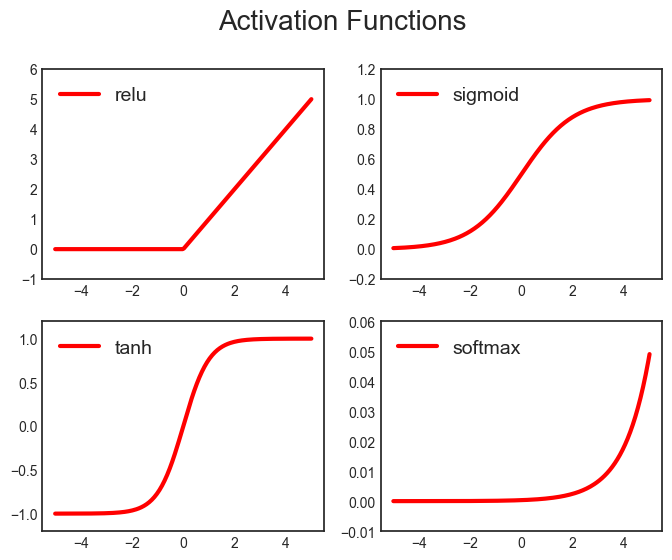

In [24]:
make_new_figure_1()

ReLu é muito popular porque não é linear.

### Otimização e Descida de Gradiente

### Descida de gradiente

A descida do gradiente funciona da seguinte maneira:

Inicializar os parâmetros
Calcule a perda
Calcular os gradientes
Atualizar os Parâmetros
Repita (1)-(3) até a convergência

### Gradiente descendente em regressão linear
Para entender como as redes neurais (RNs) são otimizadas, começaremos com um exemplo de regressão linear. Lembre-se de que a regressão linear pode ser interpretada como a RN mais simples possível.

Geramos os seguintes dados:


com
e

In [25]:
# Data Generation
np.random.seed(42)
N = 100

x = np.sort(np.random.rand(N, 1), axis=0)
e = .1*np.random.randn(N, 1)
y_true = 1 + 2*x - 3*x**2
y = y_true + e

Vamos plotar os dados

In [26]:
# New figure 2
def make_new_figure_2():
    
    # Init
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('Activation Functions')

    # Scatter
    ax.scatter(x,y); 
    ax.plot(x,y_true,color='orange'); 
    ax.set_xlabel('X'); ax.set_ylabel('Y');
    ax.legend(['y true','y']);

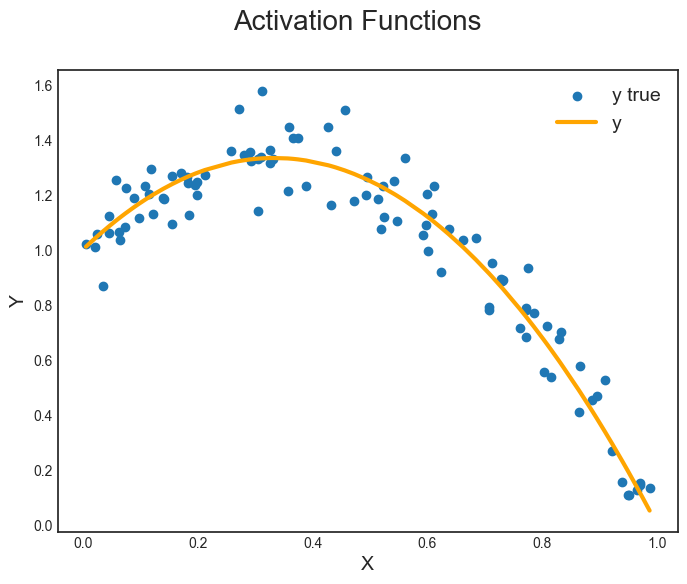

In [27]:
make_new_figure_2()

Suponha que tentamos ajustar os dados com um modelo linear


Prosseguimos iterativamente por gradiente descendente. Nossa função objetivo é o Erro Quadrático Médio.

Algoritmo

Faça uma estimativa inicial dos parâmetros

Calcule o erro quadrático médio $$ \begin{array} \text{MSE} &= \frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y} {i}\right)^{2} \ &= \frac{1}{N} \sum {i=1}^{N}\left(y_{i}-ab x_{i}\right)^{2} \end{array} $$

Calcule sua derivada $$ \begin{array}{l} \frac{\partial MSE}{\partial a}=\frac{\partial MSE}{\partial \hat{y} {i}} \cdot \frac{\partial \hat{y} {i}}{\partial a}=\frac{1}{N} \sum_{i=1}^{N} 2\left(y_{i}-ab x_{i}\right) \cdot(-1)=-2 \frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y} {i}\right) \ \frac{\partial MSE}{\partial b}=\frac{\partial MSE}{\partial \hat{y} {i}} \cdot \frac{\partial \hat{y} {i}}{\partial b}=\frac{1}{N} \sum {i=1}^{N} 2\esquerda(y_{i}-ab x_{i}\direita) \cdot\esquerda(-x_{i}\direita)=-2 \frac{1}{N} \soma_{i=1}^{N} x_{i}\esquerda(y_{i}-\hat{y}_{i}\direita) \fim{matriz} $$

Atualizar os parâmetros
 
 
 

Onde
é a taxa de aprendizagem . Uma taxa de aprendizagem menor torna o aprendizado mais estável, porém mais lento.

Repita (1)-(3)
vezes, onde o número total de iterações
é chamado de épocas .

Começamos fazendo um palpite aleatório de
e
.

In [28]:
# Initializes parameters "a" and "b" randomly
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print(a, b)

[0.49671415] [-0.1382643]


In [29]:
# Plot gradient 
def gradient_plot(x, y, y_hat, y_true, EPOCHS, losses):
    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
    
    # First figure
    ax1.clear()
    ax1.scatter(x, y)
    ax1.plot(x, y_true, 'orange')
    ax1.plot(x, y_hat, 'r-')
    ax1.set_title('Data and Fit')
    ax1.legend(['True', 'Predicted'])
    
    # Second figure
    ax2.clear()
    ax2.plot(range(len(losses)), losses, color='g')
    ax2.set_xlim(0,EPOCHS); ax2.set_ylim(0,1.1*np.max(losses))
    ax2.set_title('True MSE = %.4f' % losses[-1])
    
    # Plot
    plt.show();

Definimos a taxa de aprendizagem
e o número de épocas

In [30]:
# parameters
LR = 0.1        # learning rate
EPOCHS = 200    # number of epochs

Agora podemos plotar o treinamento e o resultado.

In [31]:
# New figure 3
def make_new_figure_3(a, b):
    
    # Init
    losses = []

    # train
    for t in range(EPOCHS):

        # compute loss
        y_hat = a + b * x
        error = (y - y_hat)
        loss = (error**2).mean()

        # compute gradient
        a_grad = -2 * error.mean()
        b_grad = -2 * (x * error).mean()

        # update parameters
        a -= LR * a_grad
        b -= LR * b_grad

        # plot
        losses += [loss]
        if (t+1) % (EPOCHS/25) == 0: # print 25 times
            gradient_plot(x, y, y_hat, y_true, EPOCHS, losses)

    print(a, b)
    return a, b

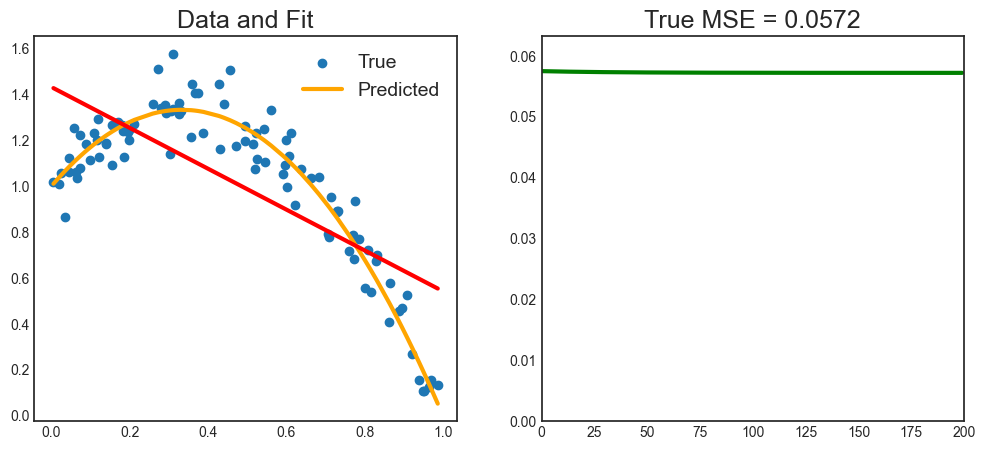

[1.4328763] [-0.89070972]


In [33]:
a_fit, b_fit = make_new_figure_3(a, b)

Verificação de integridade: obtemos os mesmos resultados da nossa descida de gradiente?

In [34]:
# OLS estimates
ols = LinearRegression()
ols.fit(x, y)
print(ols.intercept_, ols.coef_[0])

[1.4345303] [-0.89397853]


Perto o suficiente!

Vamos plotar as duas linhas no gráfico.

In [35]:
# New figure 4
def make_new_figure_4():
    
    # Init
    fig, ax = plt.subplots(figsize=(8,6))

    # Scatter
    ax.plot(x,y_true,color='orange'); 
    ax.plot(x,a_fit + b_fit*x,color='red'); 
    ax.plot(x,ols.predict(x),color='green'); 
    ax.legend(['y true','y gd', 'y ols'])
    ax.scatter(x,y); 
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_title("Data");

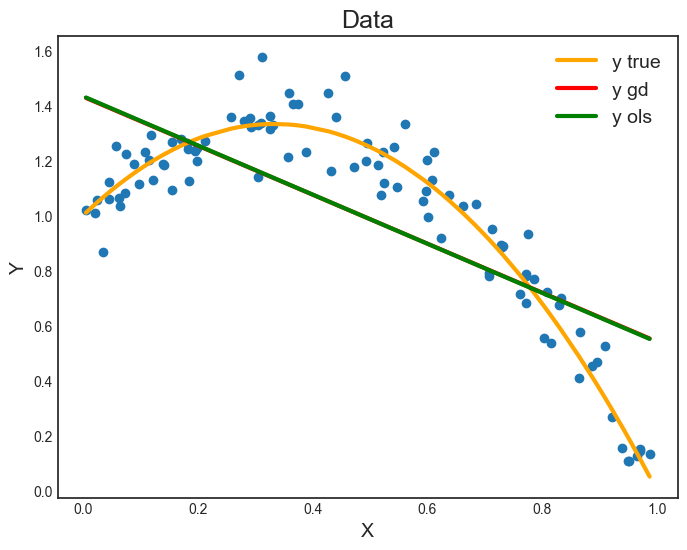

In [36]:
make_new_figure_4()

Agora faremos exatamente o mesmo, mas com pytorch.

### Autograd

Autograd é o pacote de diferenciação automática do PyTorch. Graças a ele, não precisamos nos preocupar com derivadas parciais, regra da cadeia ou algo do tipo.

Então, como dizemos ao PyTorch para fazer seu trabalho e calcular todos os gradientes? É backward()para isso que serve. § Você se lembra do ponto de partida para calcular os gradientes? Foi a perda, pois calculamos suas derivadas parciais em relação aos nossos parâmetros. Portanto, precisamos invocar o backward()método a partir da variável Python correspondente, como loss.backward().

E quanto aos valores reais dos gradientes? Podemos inspecioná-los observando o atributo grad de um tensor.

Se você verificar a documentação do método, verá que ela afirma claramente que os gradientes são acumulados. Portanto, toda vez que usamos os gradientes para atualizar os parâmetros, precisamos zerá-los posteriormente. E é para isso que serve a função zero_().

O que significa o sublinhado (_) no final do nome do método? Você se lembra? Se não, volte para a seção anterior e descubra.

Então, vamos abandonar o cálculo manual de gradientes e usar os métodos backward() e zero_().

Primeiro, convertemos nossas variáveis ​​em tensores.

In [37]:
# Convert data to tensors
x_tensor = torch.from_numpy(x).float().to('cpu')
y_tensor = torch.from_numpy(y).float().to('cpu')
print(type(x), type(x_tensor))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


Tomamos como estimativa os parâmetros iniciais

In [38]:
# initial parameter guess
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device='cpu')
b = torch.randn(1, requires_grad=True, dtype=torch.float, device='cpu')

Agora estamos prontos para ajustar o modelo.

In [39]:
# New figure 5
def make_new_figure_5(a, b):
    
    # Init
    losses = []

    # parameters
    LR = 0.1
    EPOCHS = 200

    # train
    for t in range(EPOCHS):

        # compute loss
        y_hat = a + b * x_tensor
        error = y_tensor - y_hat
        loss = (error ** 2).mean()

        # compute gradient
        loss.backward()

        # update parameters
        with torch.no_grad():
            a -= LR * a.grad
            b -= LR * b.grad

        # clear gradients
        a.grad.zero_()
        b.grad.zero_()

        # Plot
        losses += [((y_true - y_hat.detach().numpy())**2).mean()]
        if (t+1) % (EPOCHS/25) == 0: # print 25 times
            gradient_plot(x, y, y_hat.data.numpy(), y_true, EPOCHS, losses)

    print(a, b)

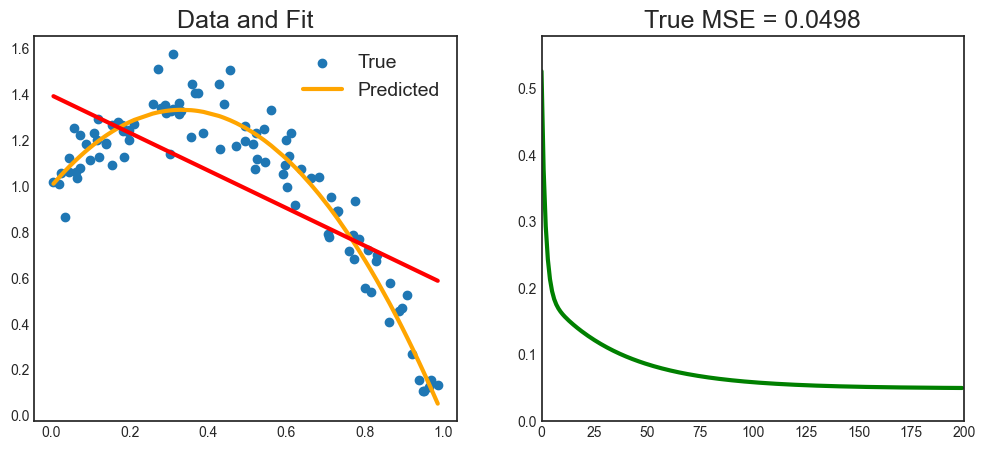

tensor([1.3978], requires_grad=True) tensor([-0.8214], requires_grad=True)


In [40]:
make_new_figure_5(a, b)

### Otimizador

Até agora, atualizamos manualmente os parâmetros usando os gradientes calculados. Isso provavelmente funciona para dois parâmetros... mas e se tivéssemos muitos deles?! Usamos um dos otimizadores do PyTorch.

Um otimizador aceita os seguintes argumentos:

os parâmetros que queremos atualizar
a taxa de aprendizagem que queremos usar
(possivelmente muitos outros hiperparâmetros)
Além disso, agora podemos chamar a função zero_grad()para atualizar os parâmetros automaticamente. Em particular, precisaremos executar os seguintes passos a cada iteração:

Limpe os parâmetros:optimizer.zero_grad()
Calcule o gradiente:loss.backward()
Atualize os parâmetros:optimizer.step()
No código abaixo, criamos um SGDotimizador Stochastic Gradient Descent ( ) para atualizar nossos parâmetros
e
.

In [41]:
# Init parameters
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device='cpu')
b = torch.randn(1, requires_grad=True, dtype=torch.float, device='cpu')

# Defines a SGD optimizer to update the parameters
optimizer = torch.optim.SGD([a, b], lr=LR)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


Também podemos definir uma função de perda padrão para que não precisemos calculá-la manualmente. Usaremos a MSEfunção de perda.

In [42]:
# Define a loss function
loss_func = torch.nn.MSELoss()
print(loss_func)

MSELoss()


Vamos plotar o estimador e o MSE.

In [44]:
# New figure 6
def make_new_figure_6(a, b):
    
    # parameters
    EPOCHS = 200

    # init 
    losses = []

    # train
    for t in range(EPOCHS):

        # compute loss
        y_hat = a + b * x_tensor
        error = y_tensor - y_hat
        loss = (error ** 2).mean()  

        # update parameters
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients, update parameters

        # Plot
        losses += [((y_true - y_hat.detach().numpy())**2).mean()]
        if (t+1) % (EPOCHS/25) == 0:
            gradient_plot(x, y, y_hat.data.numpy(), y_true, EPOCHS, losses)

    print(a, b)

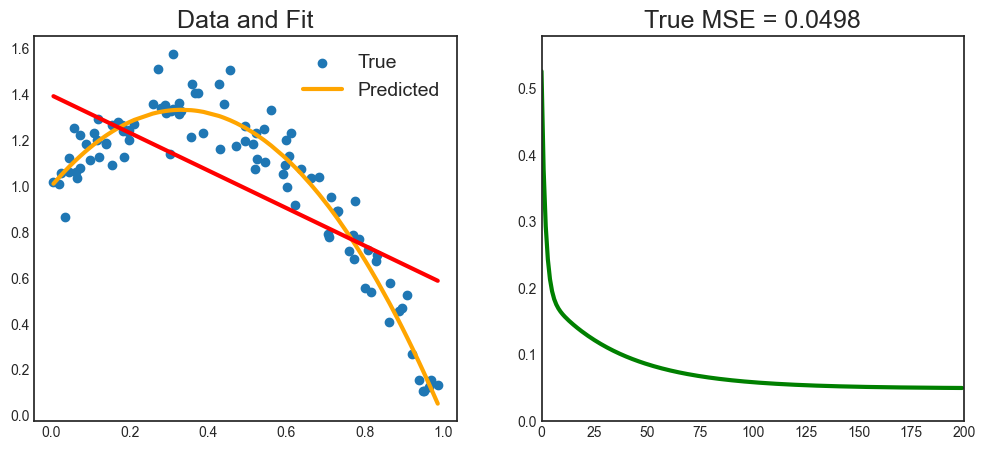

tensor([1.3978], requires_grad=True) tensor([-0.8214], requires_grad=True)


In [45]:
make_new_figure_6(a, b)

### Construindo uma NN

Em nosso modelo, criamos manualmente dois parâmetros para realizar uma regressão linear. Vamos usar Sequentialo módulo do PyTorch para criar nossa rede neural.

Primeiro queremos construir a estrutura de regressão linear


Que essencialmente é uma rede com

1 entrada
nenhuma camada oculta
nenhuma função de ativação
1 saída
Vamos construir a rede neural mais simples possível com PyTorch.

In [46]:
# Simplest possible neural network
linear_net = torch.nn.Sequential(
    torch.nn.Linear(1, 1)
)

print(linear_net)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)


Agora, se chamarmos o parameters()método deste modelo, o PyTorch irá calcular os parâmetros dos seus atributos de forma recursiva.

In [47]:
[*linear_net.parameters()]

[Parameter containing:
 tensor([[-0.2191]], requires_grad=True),
 Parameter containing:
 tensor([0.2018], requires_grad=True)]

Agora podemos definir a função de treinamento definitiva.

In [48]:
def train_NN(x, y, y_true, net, optimizer, loss_func, EPOCHS):
    
    # transform variables
    x_tensor = torch.from_numpy(x).float().to('cpu')
    y_tensor = torch.from_numpy(y).float().to('cpu')

    # init 
    losses = []
    
    # train
    for t in range(EPOCHS):        

        # compute loss
        y_hat = net(x_tensor)     
        loss = loss_func(y_hat, y_tensor)    
        
        # update parameters
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients, update parameters

        # plot
        losses += [((y_true - y_hat.detach().numpy())**2).mean()]
        if (t+1) % (EPOCHS/25) == 0: # print 25 times
            gradient_plot(x, y, y_hat.data.numpy(), y_true, EPOCHS, losses)

Agora estamos prontos para treinar nossa rede neural.

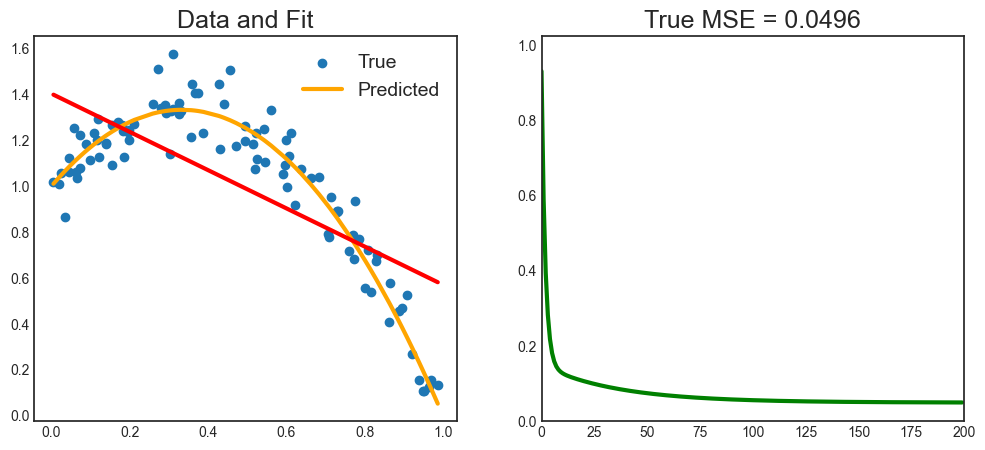

In [49]:
optimizer = torch.optim.SGD(linear_net.parameters(), lr=LR)

# train
train_NN(x, y, y_true, linear_net, optimizer, loss_func, EPOCHS)

Agora definimos uma NN mais complicada. Em particular, construímos uma rede neural com

1 entrada
1 camada oculta com 10 neurônios e função de ativação Relu
1 camada de saída

In [50]:
# Relu Net
relu_net = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

print(relu_net)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


Esta rede tem muito mais parâmetros.

In [51]:
[*relu_net.parameters()]

[Parameter containing:
 tensor([[-0.4869],
         [ 0.5873],
         [ 0.8815],
         [-0.7336],
         [ 0.8692],
         [ 0.1872],
         [ 0.7388],
         [ 0.1354],
         [ 0.4822],
         [-0.1412]], requires_grad=True),
 Parameter containing:
 tensor([ 0.7709,  0.1478, -0.4668,  0.2549, -0.4607, -0.1173, -0.4062,  0.6634,
         -0.7894, -0.4610], requires_grad=True),
 Parameter containing:
 tensor([[-0.0893, -0.1901,  0.0298, -0.3123,  0.2856, -0.2686,  0.2441,  0.0526,
          -0.1027,  0.1954]], requires_grad=True),
 Parameter containing:
 tensor([0.0493], requires_grad=True)]

Estamos usando novamente o Stochastic Gradient Descent ( SGD) como algoritmo de otimização e o Mean Squared Error ( MSELoss) como função objetivo.

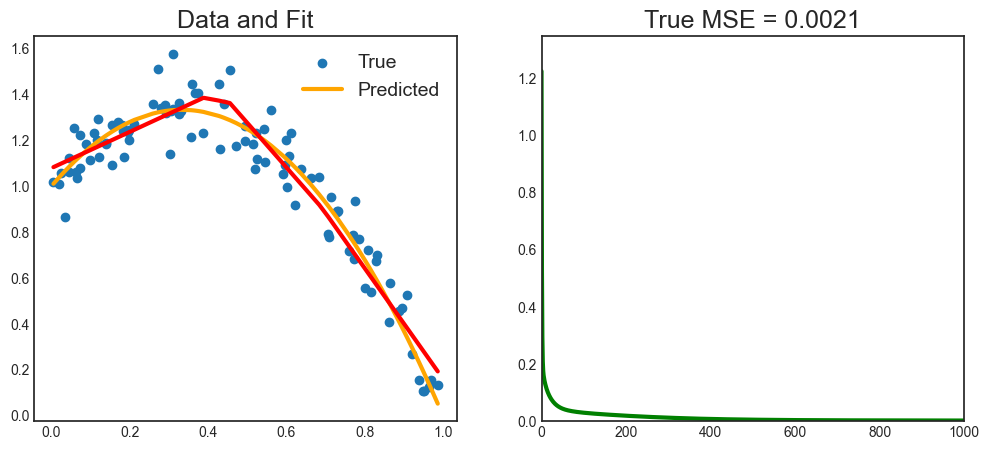

In [52]:
# parameters
LR = 0.1
EPOCHS = 1000

# optimizer and loss function
optimizer = torch.optim.SGD(relu_net.parameters(), lr=LR)
loss_func = torch.nn.MSELoss()

# Train
train_NN(x, y, y_true, relu_net, optimizer, loss_func, EPOCHS)

Parece que podemos usar menos nós para obter o mesmo resultado.

Vamos fazer uma rede menor.

In [53]:
# Relu Net
relu_net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 4),
    torch.nn.ReLU(),
    torch.nn.Linear(4, 1)
)

E treine-o.

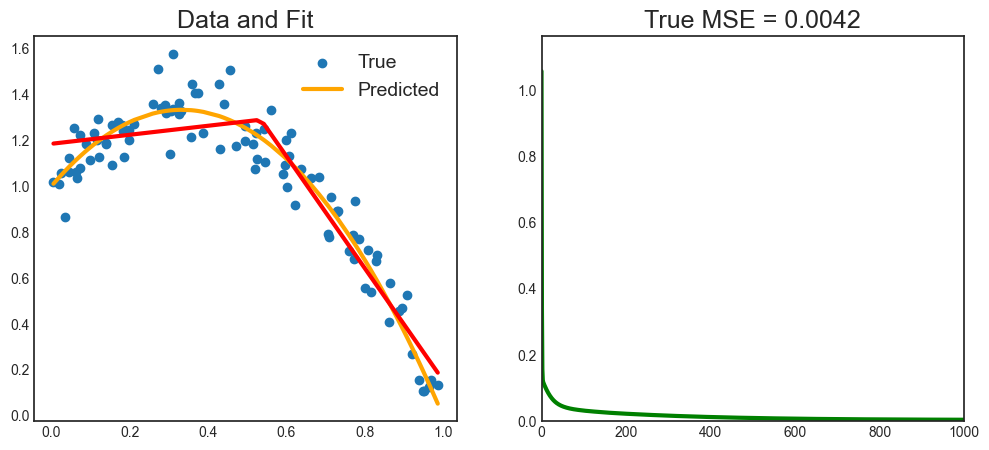

In [54]:
# parameters
LR = 0.1
EPOCHS = 1000

# optimizer and loss function
optimizer = torch.optim.SGD(relu_net2.parameters(), lr=LR)
loss_func = torch.nn.MSELoss()

# Train
train_NN(x, y, y_true, relu_net2, optimizer, loss_func, EPOCHS)

Podemos tentar diferentes funções de ativação.

Por exemplo, a tangente.

In [55]:
# TanH Net
tanh_net = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.Tanh(),
    torch.nn.Linear(10, 1)
)

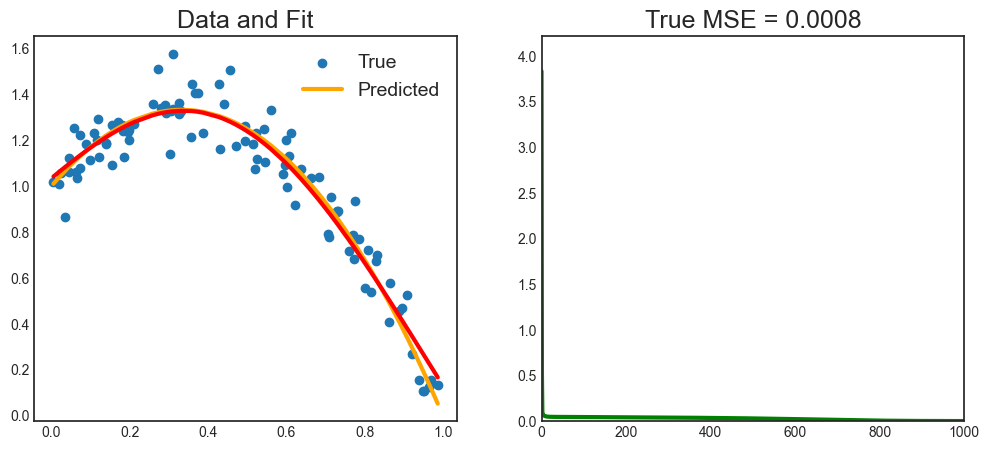

In [56]:
# parameters
LR = 0.2
EPOCHS = 1000

# optimizer and loss function
optimizer = torch.optim.SGD(tanh_net.parameters(), lr=LR)
loss_func = torch.nn.MSELoss()

# train
train_NN(x, y, y_true, tanh_net, optimizer, loss_func, EPOCHS)

### Funções de perda

Até agora usamos o estocástico como função de perda.

Observe que isso, nn.MSELossna verdade, cria uma função de perda para nós — NÃO é a função de perda em si. Além disso, você pode especificar um método de redução a ser aplicado, ou seja, como deseja agregar os resultados para pontos individuais — você pode calcular a média (redução= mean) ou simplesmente somá-los (redução= sum).

Agora vamos usar outros diferentes.

In [57]:
# parameters
LR = 0.1
EPOCHS = 25

# nets
n = torch.nn.Sequential(torch.nn.Linear(1, 10), torch.nn.ReLU(), torch.nn.Linear(10, 1))
nets = [n,n,n,n]

# optimizers
optimizers = [torch.optim.SGD(n.parameters(), lr=LR) for n in nets]

# different loss functions
loss_MSE        = torch.nn.MSELoss()
loss_L1         = torch.nn.L1Loss()
loss_NLL        = torch.nn.NLLLoss()
loss_KLD        = torch.nn.KLDivLoss()
loss_funcs = [loss_MSE, loss_L1, loss_NLL, loss_KLD]

Esta é a descrição das funções de perda:

MSELoss: Cria um critério que mede o erro quadrático médio (norma L2 quadrada) entre cada elemento na entrada
e alvo
.

L1Loss: Cria um critério que mede o erro absoluto médio (MAE) entre cada elemento na entrada
e alvo
.

NLLLoss: A perda de verossimilhança de log negativo.

KLDivLoss: A medida de perda de divergência de Kullback-Leibler

In [58]:
# Train multiple nets
def train_nets(x, y, y_true, nets, optimizers, loss_funcs, labels, EPOCHS):

    # Put dateset into torch dataset
    x_tensor = torch.from_numpy(x).float().to('cpu')
    y_tensor = torch.from_numpy(y).float().to('cpu')
    torch_dataset = Data.TensorDataset(x_tensor, y_tensor)
    
    # Init
    losses = np.zeros((0,4))
    
    # Train
    for epoch in range(EPOCHS): # for each epoch
        losses = np.vstack((losses, np.zeros((1,4))))
        for k, net, opt, lf in zip(range(4), nets, optimizers, loss_funcs):
            y_hat = net(x_tensor)              # get output for every net
            loss = loss_func(y_hat, y_tensor)  # compute loss for every net
            opt.zero_grad()                    # clear gradients for next train
            loss.backward()                    # backpropagation, compute gradients
            opt.step()                         # apply gradients
            losses[-1,k] = ((y_true - y_hat.detach().numpy())**2).mean()
        plot_losses(losses, labels, EPOCHS)

In [59]:
# Plot losses 
def plot_losses(losses, labels, EPOCHS):
    clear_output(wait=True)
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    
    # Plot
    ax.clear()
    ax.plot(range(len(losses)), losses)
    ax.set_xlim(0,EPOCHS-1); ax.set_ylim(0,1.1*np.max(losses))
    ax.set_title('Compare Losses'); ax.set_ylabel('True MSE')
    legend_txt = ['%s=%.4f' % (label, loss) for label,loss in zip(labels, losses[-1,:])]
    ax.legend(legend_txt)
    
    # Shot
    plt.show();

Vamos compará-los.

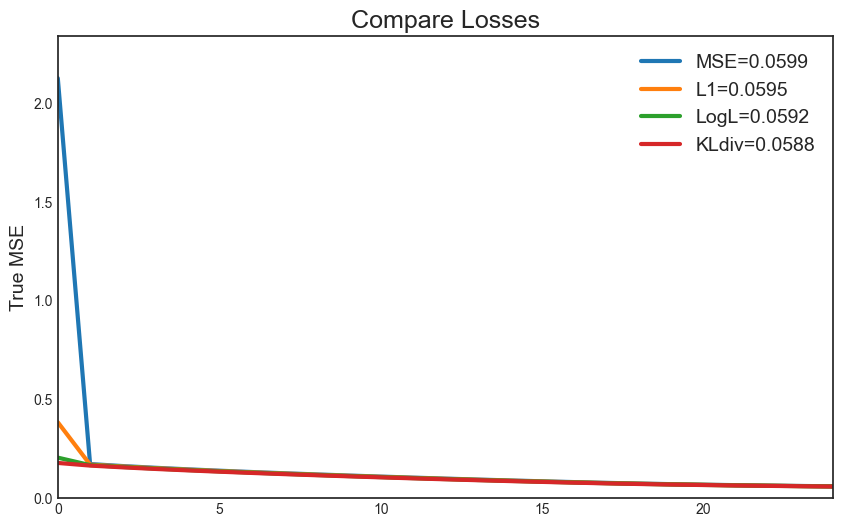

In [60]:
# Train
labels = ['MSE', 'L1', 'LogL', 'KLdiv']
train_nets(x, y, y_true, nets, optimizers, loss_funcs, labels, EPOCHS)

Neste caso muito simples, todas as funções de perda são muito semelhantes.

### Otimizadores


Até agora, usamos o método de gradiente descendente estocástico para ajustar a rede neural. Agora, usaremos métodos diferentes.

Esta é a descrição dos otimizadores :

SGD: Implementa descida de gradiente estocástico (opcionalmente com momentum).

Momentum: O momentum de Nesterov é baseado na fórmula de Sobre a importância da inicialização e do momentum no aprendizado profundo .

RMSprop: Proposto por G. Hinton em seu curso . A versão centralizada aparece pela primeira vez em Gerando Sequências com Redes Neurais Recorrentes . A implementação aqui calcula a raiz quadrada da média do gradiente antes de adicionar epsilon (observe que o TensorFlow alterna essas duas operações). A taxa de aprendizado efetiva é, portanto,
 
onde
é a taxa de aprendizagem programada e
é a média móvel ponderada do gradiente quadrado.

Adam: Proposto em Adam: Um Método para Otimização Estocástica . A implementação da penalidade de nível 2 segue as mudanças propostas em Regularização de Decaimento de Peso Desacoplado .

In [61]:
# parameters
LR = 0.1
EPOCHS = 25

# nets
n = torch.nn.Sequential(torch.nn.Linear(1, 10), torch.nn.ReLU(), torch.nn.Linear(10, 1))
nets = [n,n,n,n]

# different optimizers
opt_SGD         = torch.optim.SGD(nets[0].parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(nets[1].parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(nets[2].parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(nets[3].parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

# loss functions
l = torch.nn.MSELoss()
loss_funcs = [l,l,l,l]

Vamos proteger as funções de perda durante o treinamento, para diferentes otimizadores.

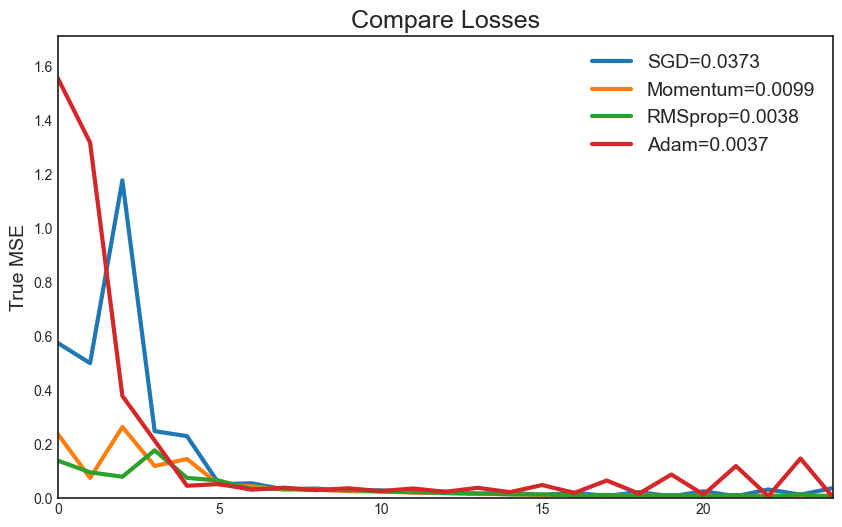

In [62]:
# train
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
train_nets(x, y, y_true, nets, optimizers, loss_funcs, labels, EPOCHS)

### Treinamento em lote

Até agora, usamos todos os dados de treinamento em todas as etapas. O método utilizado foi a descida gradual em lote.

Isso é bom para o nosso conjunto de dados ridiculamente pequeno, claro, mas se quisermos levar tudo isso a sério, precisamos usar a descida de gradiente em minilotes. Portanto, precisamos de minilotes. Portanto, precisamos fatiar nosso conjunto de dados adequadamente. Você quer fazer isso manualmente?! Eu também não!

Então, usamos DataLoadera classe do PyTorch para esta tarefa. Dizemos a ela qual conjunto de dados usar (aquele que acabamos de construir na seção anterior), o tamanho desejado do minilote e se queremos embaralhá-lo ou não. É isso!

Nosso carregador se comportará como um iterador, então podemos fazer um loop sobre ele e buscar um minilote diferente a cada vez.

In [63]:
# Init data
x_tensor = torch.from_numpy(x).float().to('cpu')
y_tensor = torch.from_numpy(y).float().to('cpu')
torch_dataset = Data.TensorDataset(x_tensor, y_tensor)

# Build DataLoader
BATCH_SIZE = 25
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training
)

Vamos tentar usar subamostras de dimensão BATCH_SIZE = 25.

In [64]:
def train_NN_batch(loader, y_true, net, optimizer, loss_func, EPOCHS):
    
    # init
    losses = []

    # train
    for t in range(EPOCHS):   
        # train entire dataset 3 times
        for step, (batch_x, batch_y) in enumerate(loader):

            # compute loss
            y_hat = net(batch_x)     
            loss = loss_func(y_hat, batch_y)    

            # update parameters
            optimizer.zero_grad()   # clear gradients for next train
            loss.backward()         # backpropagation, compute gradients
            optimizer.step()        # apply gradients

        # plt every epoch
        y_hat = net(x_tensor)  
        losses += [((y_true - y_hat.detach().numpy())**2).mean()]
        if (t+1) % (EPOCHS/25) == 0:
            gradient_plot(x, y, y_hat.data.numpy(), y_true, EPOCHS, losses)

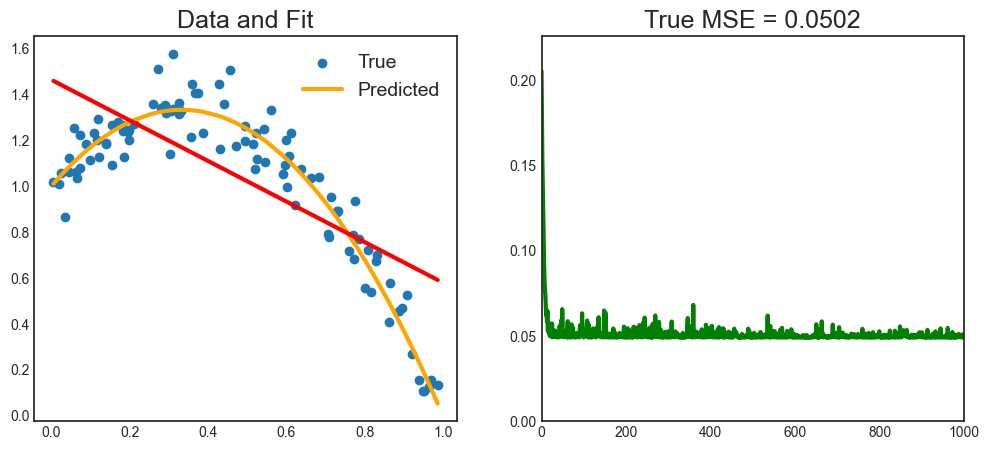

In [65]:
# parameters
LR = 0.1
EPOCHS = 1000
net = torch.nn.Sequential(torch.nn.Linear(1, 10), torch.nn.ReLU(), torch.nn.Linear(10, 1))
optimizer = torch.optim.SGD(net.parameters(), lr=LR)
loss_func = torch.nn.MSELoss()

# Train
train_NN_batch(loader, y_true, net, optimizer, loss_func, EPOCHS)


Duas coisas são diferentes agora: não só temos um loop interno para carregar cada minilote do nosso DataLoader, mas, mais importante, agora estamos enviando apenas um minilote para o dispositivo.

Para conjuntos de dados maiores, carregar dados amostra por amostra (em um tensor de CPU) usando conjuntos de dados __get_item__e então enviar todas as amostras que pertencem ao mesmo minilote de uma só vez para sua GPU (dispositivo) é a maneira de fazer o melhor uso da RAM da sua placa de vídeo.

Além disso, se você tiver muitas GPUs para treinar seu modelo, é melhor manter seu conjunto de dados “agnóstico” e atribuir os lotes a diferentes GPUs durante o treinamento.

Tópicos Avançados
Problemas
Valores iniciais
Normalmente, os valores iniciais dos pesos são escolhidos como valores aleatórios próximos de zero. Portanto, o modelo começa quase linear e se torna não linear à medida que os pesos aumentam.

Sobreajuste
Nos primeiros desenvolvimentos de redes neurais, seja por projeto ou por acidente, uma regra de parada antecipada era usada para evitar overfitting.

Um método mais explícito para regularização é a redução de peso .

Dimensionamento das entradas
Como a escala das entradas determina a escala efetiva dos pesos na camada inferior, ela pode ter um grande efeito na qualidade da solução final. Inicialmente, é melhor padronizar todas as entradas para que a média seja zero e o desvio padrão seja um.

Número de unidades e camadas ocultas
De modo geral, é melhor ter unidades ocultas em excesso do que em falta. Com unidades ocultas em falta, o modelo pode não ter flexibilidade suficiente para capturar as não linearidades nos dados; com unidades ocultas em excesso, os pesos extras podem ser reduzidos a zero se a regularização apropriada for utilizada.

A escolha do número de camadas ocultas é guiada pelo conhecimento prévio e pela experimentação. Cada camada extrai características da entrada para regressão ou classificação. O uso de múltiplas camadas ocultas permite a construção de características hierárquicas em diferentes níveis de resolução.

Você pode ter uma ideia do papel das camadas ocultas aqui: https://playground.tensorflow.org/

Mínimos Múltiplos
A função de erro R(θ) é não convexa, possuindo muitos mínimos locais. Uma abordagem é usar as previsões médias sobre o conjunto de redes como a previsão final. Outra abordagem é por meio de bagging .

Redes Neurais Profundas e Aprendizado Profundo
Redes Neurais Profundas são apenas Redes Neurais com mais de uma camada oculta.

Redes Neurais Convolucionais
Redes Neurais Convolucionais são frequentemente aplicadas ao lidar com dados de imagem/vídeo. Geralmente, são codificadas com cada característica sendo um pixel e seu valor é a cor do pixel (matriz RGB tridimensional).







Vídeos e imagens têm 2 características principais:

tem muitos recursos
As características “próximas” são frequentemente semelhantes
Redes Neurais Convolucionais exploram a segunda característica para aliviar os problemas computacionais decorrentes da primeira. Elas fazem isso construindo uma primeira camada que não se baseia em todas as características, mas apenas nas adjacentes.









Dessa forma, a maior parte da informação é preservada, em uma representação dimensional inferior.

Redes Neurais Recorrentes
Redes Neurais Recorrentes são frequentemente aplicadas em contextos nos quais o processo de geração de dados é dinâmico. O exemplo mais importante é o Processamento de Linguagem Natural. A ideia é fazer previsões "ao vivo" conforme os dados chegam. Além disso, a ordem dos dados é relevante, para que você também queira acompanhar o que o modelo aprendeu até o momento.

Embora as RNNs aprendam de forma semelhante durante o treinamento, elas também se lembram do que aprenderam com entradas anteriores enquanto geram saídas. Isso faz parte da rede. As RNNs podem receber um ou mais vetores de entrada e produzir um ou mais vetores de saída, e as saídas são influenciadas não apenas pelos pesos aplicados às entradas, como uma NN comum, mas também por um vetor de estado "oculto" que representa o contexto com base nas entradas/saídas anteriores. Portanto, a mesma entrada pode produzir uma saída diferente dependendo das entradas anteriores na série.

Graficamente:






Em resumo, em uma rede neural vanilla, um vetor de entrada de tamanho fixo é transformado em um vetor de saída de tamanho fixo. Essa rede se torna "recorrente" quando você aplica repetidamente as transformações a uma série de entradas fornecidas e produz uma série de vetores de saída.

RNN bidirecional
Às vezes, não se trata apenas de aprender com o passado para prever o futuro, mas também de olhar para o futuro para consertar o passado. Em tarefas de reconhecimento de fala e de caligrafia, onde pode haver considerável ambiguidade dada apenas uma parte da entrada, muitas vezes precisamos saber o que vem a seguir para entender melhor o contexto e detectar o presente.






Isso introduz o desafio óbvio de até que ponto do futuro precisamos analisar, porque se tivermos que esperar para ver todas as informações, toda a operação se tornará custosa.

Rede Neural Recursiva
Uma rede neural recorrente analisa as entradas de forma sequencial. Uma rede neural recursiva é semelhante na medida em que as transições são aplicadas repetidamente às entradas, mas não necessariamente de forma sequencial. Redes Neurais Recursivas são uma forma mais geral de Redes Neurais Recorrentes. Elas podem operar em qualquer estrutura hierárquica em árvore. Analisando os nós de entrada, combinando nós filhos em nós pais e combinando-os com outros nós filhos/pais para criar uma estrutura semelhante a uma árvore. Redes Neurais Recorrentes fazem o mesmo, mas a estrutura é estritamente linear, ou seja, os pesos são aplicados ao primeiro nó de entrada, depois ao segundo, terceiro e assim por diante.


Mas isso levanta questões relativas à estrutura. Como decidimos isso? Se a estrutura for fixa, como em Redes Neurais Recorrentes, então o processo de treinamento, backprop etc. faz sentido, pois são semelhantes a uma rede neural comum. Mas se a estrutura não for fixa, isso também é aprendido?


